In [1]:
import requests
import json
import os
import time
import pandas as pd
from IPython.display import Image, display, HTML
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from io import BytesIO


test_books = pd.DataFrame({
    'Title': [
        'The Lord of the Rings',
        'Sapiens: A Brief History of Humankind',
        'Thinking, Fast and Slow',
        'Harry Potter and the Philosopher\'s Stone',
        'The Hitchhiker\'s Guide to the Galaxy'
    ],
    'Author': [
        'J.R.R. Tolkien',
        'Yuval Noah Harari',
        'Daniel Kahneman',
        'J.K. Rowling',
        'Douglas Adams'
    ]
})

test_books

,Title,Author
0,The Lord of the Rings,J.R.R. Tolkien
1,Sapiens: A Brief History of Humankind,Yuval Noah Harari
2,"Thinking, Fast and Slow",Daniel Kahneman
3,Harry Potter and the Philosopher's Stone,J.K. Rowling
4,The Hitchhiker's Guide to the Galaxy,Douglas Adams


In [ ]:
def get_book_cover(title, author):
    """
    Retrieves a book cover from Google Books API

    Args:
        title (str): The book title
        author (str): The book author

    Returns:
        dict: A dictionary with the cover URL and other information
    """
    cover_data = {}

    try:
        # Query Google Books API
        query = f"{title} {author}".replace(' ', '+')
        response = requests.get(
            f"https://www.googleapis.com/books/v1/volumes?q={query}&maxResults=1"
        )

        if response.status_code == 200:
            data = response.json()

            # Extract cover URL if available
            if 'items' in data and len(data['items']) > 0:
                volume_info = data['items'][0]['volumeInfo']

                # Store basic book info
                cover_data['title'] = title
                cover_data['author'] = author

                # Get Google Books ID
                cover_data['google_books_id'] = data['items'][0]['id']

                # Get book information if available
                if 'description' in volume_info:
                    cover_data['description'] = volume_info['description']

                if 'publishedDate' in volume_info:
                    cover_data['published_date'] = volume_info['publishedDate']

                if 'pageCount' in volume_info:
                    cover_data['page_count'] = volume_info['pageCount']

                # Get the cover image URL
                if 'imageLinks' in volume_info:
                    # Get the largest available image
                    if 'large' in volume_info['imageLinks']:
                        cover_data['cover_url'] = volume_info['imageLinks']['large']
                    elif 'medium' in volume_info['imageLinks']:
                        cover_data['cover_url'] = volume_info['imageLinks']['medium']
                    else:
                        cover_data['cover_url'] = volume_info['imageLinks'].get(
                            'thumbnail',
                            volume_info['imageLinks'].get('smallThumbnail', None)
                        )
    except Exception as e:
        print(f"Error processing {title}: {str(e)}")

    return cover_data


,Title,Author
0,The Lord of the Rings,J.R.R. Tolkien
1,Sapiens: A Brief History of Humankind,Yuval Noah Harari
2,L'Étranger,Albert Camus
3,Harry Potter and the Philosopher's Stone,J.K. Rowling
4,One Hundred Years of Solitude,Gabriel García Márquez



Processing: The Lord of the Rings by J.R.R. Tolkien
✓ Selected edition:
  Language: en
  Publisher: HarperCollins
  Score: 105.47664925007902
  Cover URL: https://books.google.com/books/content?id=yl4dILkcqm4C&printsec=frontcover&img=1

Processing: Sapiens: A Brief History of Humankind by Yuval Noah Harari
✓ Selected edition:
  Language: en
  Publisher: Random House
  Score: 100.69484807238462
  Cover URL: https://books.google.com/books/content?id=1EiJAwAAQBAJ&printsec=frontcover&img=1

Processing: L'Étranger by Albert Camus
✓ Selected edition:
  Language: en
  Publisher: Knopf
  Score: 85.07944154167984
  Cover URL: https://books.google.com/books/content?id=CAPYAAAAMAAJ&printsec=frontcover&img=1

Processing: Harry Potter and the Philosopher's Stone by J.K. Rowling
✓ Selected edition:
  Language: en
  Publisher: Bloomsbury Children's Books
  Score: 85.07944154167984
  Cover URL: https://books.google.com/books/content?id=O-gmvgAACAAJ&printsec=frontcover&img=1

Processing: One Hundred Y

,title,author,language,publisher,score,processing_time
0,The Lord of the Rings,J.R.R. Tolkien,en,HarperCollins,105.476649,0.63
1,Sapiens: A Brief History of Humankind,Yuval Noah Harari,en,Random House,100.694848,0.53
2,L'Étranger,Albert Camus,en,Knopf,85.079442,0.56
3,Harry Potter and the Philosopher's Stone,J.K. Rowling,en,Bloomsbury Children's Books,85.079442,0.51
4,One Hundred Years of Solitude,Gabriel García Márquez,en,Penguin UK,98.375278,0.65


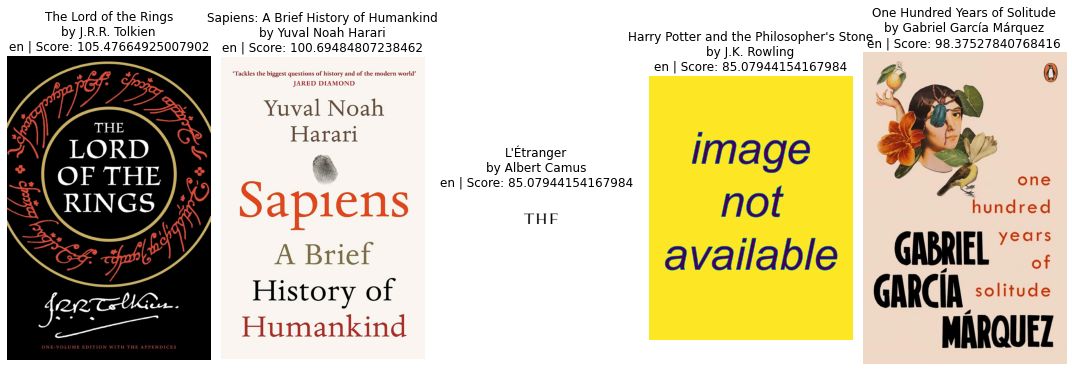

Test complete! Results saved.
Processing 5 unique books...
[1/5] Retrieving cover for: The Lord of the Rings
[2/5] Retrieving cover for: Sapiens: A Brief History of Humankind
[3/5] Retrieving cover for: L'Étranger
[4/5] Retrieving cover for: Harry Potter and the Philosopher's Stone
[5/5] Retrieving cover for: One Hundred Years of Solitude
Cache saved with 5 books


,Title,Author,cover_url
0,The Lord of the Rings,J.R.R. Tolkien,https://books.google.com/books/content?id=yl4d...
1,Sapiens: A Brief History of Humankind,Yuval Noah Harari,https://books.google.com/books/content?id=1EiJ...
2,L'Étranger,Albert Camus,https://books.google.com/books/content?id=CAPY...
3,Harry Potter and the Philosopher's Stone,J.K. Rowling,https://books.google.com/books/content?id=O-gm...
4,One Hundred Years of Solitude,Gabriel García Márquez,https://books.google.com/books/content?id=RyGV...


In [ ]:
# improved_book_cover_test.ipynb

# %% [markdown]
# # Improved Book Cover Retrieval Test
#
# This notebook demonstrates a more sophisticated approach to retrieving book covers from Google Books API, with:
# 1. Preference for English editions when available
# 2. Selection of the most popular/best edition based on various metrics

# %%
import requests
import json
import os
import time
import pandas as pd
from IPython.display import Image, display, HTML
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from io import BytesIO
import re

# %% [markdown]
# ## Create Test Data
#
# Let's test with a mix of well-known English books and some non-English books.

# %%
# Sample data with 5 books - mix of well-known and international titles
test_books = pd.DataFrame({
    'Title': [
        'The Lord of the Rings',  # Popular English book
        'Sapiens: A Brief History of Humankind',  # Popular international book
        'L\'Étranger',  # French book by Camus
        'Harry Potter and the Philosopher\'s Stone',  # Book with different English editions
        'One Hundred Years of Solitude'  # Book with English and Spanish editions
    ],
    'Author': [
        'J.R.R. Tolkien',
        'Yuval Noah Harari',
        'Albert Camus',
        'J.K. Rowling',
        'Gabriel García Márquez'
    ]
})

display(test_books)

# %% [markdown]
# ## Improved Book Cover Retrieval Function

# %%
def get_optimized_book_cover(title, author, max_results=10):
    """
    Retrieves the best book cover from Google Books API, prioritizing:
    1. English editions when available
    2. Popular/canonical editions based on metadata quality

    Args:
        title (str): The book title
        author (str): The book author
        max_results (int): Maximum number of results to consider

    Returns:
        dict: A dictionary with the cover URL and other information
    """
    cover_data = {}
    candidates = []

    try:
        # Clean and encode the query
        title_clean = re.sub(r'[^\w\s]', '', title)
        author_clean = re.sub(r'[^\w\s]', '', author)
        query = f"intitle:{title_clean} inauthor:{author_clean}"

        # Make the API request with multiple results
        url = f"https://www.googleapis.com/books/v1/volumes?q={query}&maxResults={max_results}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()

            if 'items' not in data or len(data['items']) == 0:
                print(f"No results found for {title} by {author}")
                return cover_data

            # Prepare all candidates with scoring information
            for item in data['items']:
                if 'volumeInfo' not in item:
                    continue

                volume_info = item['volumeInfo']

                # Skip items without any image
                if 'imageLinks' not in volume_info:
                    continue

                candidate = {
                    'title': title,
                    'author': author,
                    'google_books_id': item['id'],
                    'score': 0  # Base score starts at 0
                }

                # Add all available metadata
                for field in ['description', 'publishedDate', 'pageCount', 'publisher',
                              'language', 'categories', 'averageRating', 'ratingsCount']:
                    if field in volume_info:
                        candidate[field] = volume_info[field]

                # Find best available image
                for size in ['extraLarge', 'large', 'medium', 'thumbnail', 'smallThumbnail']:
                    if size in volume_info['imageLinks']:
                        image_url = volume_info['imageLinks'][size]
                        # Convert HTTP to HTTPS for security
                        image_url = image_url.replace('http://', 'https://')
                        # Remove zoom parameters for best quality
                        image_url = image_url.split('&zoom=')[0]
                        candidate['cover_url'] = image_url
                        candidate['image_size'] = size
                        break

                # Score the candidate based on various factors

                # 1. Major boost for English editions
                if candidate.get('language') == 'en':
                    candidate['score'] += 50

                # 2. Boost for high ratings
                if 'averageRating' in candidate:
                    candidate['score'] += min(candidate['averageRating'] * 5, 20)

                # 3. Boost for number of ratings (popularity)
                if 'ratingsCount' in candidate:
                    # Log scale to prevent extremely popular books from dominating
                    import math
                    rating_boost = min(math.log(candidate['ratingsCount'] + 1) * 3, 20)
                    candidate['score'] += rating_boost

                # 4. Boost for complete metadata
                metadata_completeness = 0
                for field in ['description', 'publishedDate', 'pageCount', 'publisher', 'categories']:
                    if field in candidate:
                        metadata_completeness += 1
                candidate['score'] += metadata_completeness * 2

                # 5. Boost for better image quality
                image_quality = {'extraLarge': 10, 'large': 8, 'medium': 5,
                                'thumbnail': 3, 'smallThumbnail': 1}
                if 'image_size' in candidate:
                    candidate['score'] += image_quality.get(candidate['image_size'], 0)

                # 6. Boost for major publishers
                major_publishers = ['Penguin', 'Random House', 'HarperCollins', 'Simon & Schuster',
                                  'Hachette', 'Oxford', 'Cambridge', 'Scholastic', 'Houghton Mifflin']
                if 'publisher' in candidate:
                    for publisher in major_publishers:
                        if publisher.lower() in candidate['publisher'].lower():
                            candidate['score'] += 10
                            break

                # Add to candidates list
                candidates.append(candidate)

            # If we have candidates, select the best one
            if candidates:
                # First try: Look for English editions
                english_candidates = [c for c in candidates if c.get('language') == 'en']

                if english_candidates:
                    # Sort English editions by score
                    best_candidate = sorted(english_candidates, key=lambda x: x['score'], reverse=True)[0]
                else:
                    # If no English editions, use the highest scoring edition of any language
                    best_candidate = sorted(candidates, key=lambda x: x['score'], reverse=True)[0]

                # Return the best candidate's data
                return best_candidate

    except Exception as e:
        print(f"Error processing {title} by {author}: {str(e)}")

    return cover_data

# %% [markdown]
# ## Test the Improved Solution with Our Test Books

# %%
# Process each book and store the results
results = []

for _, row in test_books.iterrows():
    title = row['Title']
    author = row['Author']

    print(f"\nProcessing: {title} by {author}")

    # Get optimized cover data
    start_time = time.time()
    cover_data = get_optimized_book_cover(title, author)
    end_time = time.time()

    # Add processing time for performance analysis
    if cover_data:
        cover_data['processing_time'] = round(end_time - start_time, 2)
        results.append(cover_data)

        # Print summary of the selected edition
        print(f"✓ Selected edition:")
        print(f"  Language: {cover_data.get('language', 'Unknown')}")
        print(f"  Publisher: {cover_data.get('publisher', 'Unknown')}")
        print(f"  Score: {cover_data.get('score', 0)}")
        print(f"  Cover URL: {cover_data.get('cover_url', 'None')}")
    else:
        print(f"✗ No suitable cover found")

    # Sleep to avoid hitting API rate limits
    time.sleep(1)

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
display(results_df[['title', 'author', 'language', 'publisher', 'score', 'processing_time']])

# %% [markdown]
# ## Display the Selected Book Covers

# %%
# Display the covers in a grid
plt.figure(figsize=(15, 10))

for i, data in enumerate(results):
    if 'cover_url' in data:
        try:
            # Download the image
            response = requests.get(data['cover_url'])
            img = PILImage.open(BytesIO(response.content))

            # Add to plot
            plt.subplot(1, len(results), i+1)
            plt.imshow(img)
            plt.title(f"{data['title']}\nby {data['author']}\n{data.get('language', '?')} | Score: {data.get('score', 0)}")
            plt.axis('off')
        except Exception as e:
            print(f"Error displaying {data['title']}: {str(e)}")

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Create Rich HTML Display with Details

# %%
html_output = "<h2>Optimized Book Cover Results</h2>"
html_output += "<div style='display: flex; flex-wrap: wrap; gap: 20px;'>"

for data in results:
    if 'cover_url' in data:
        # Format ratings as stars if available
        rating_stars = ""
        if 'averageRating' in data:
            full_stars = int(data['averageRating'])
            half_star = data['averageRating'] % 1 >= 0.5
            empty_stars = 5 - full_stars - (1 if half_star else 0)

            rating_stars = "★" * full_stars
            rating_stars += "½" if half_star else ""
            rating_stars += "☆" * empty_stars

            if 'ratingsCount' in data:
                rating_stars += f" ({data['ratingsCount']})"

        html_output += f"""
        <div style='width: 200px; border: 1px solid #ddd; padding: 10px; border-radius: 5px;'>
            <img src='{data["cover_url"]}' style='width: 100%; height: auto;'>
            <h3 style='margin-top: 10px; margin-bottom: 5px;'>{data["title"]}</h3>
            <p style='color: #666; margin-top: 0;'>by {data["author"]}</p>
            <p><strong>Language:</strong> {data.get("language", "Unknown")}</p>
            <p><strong>Publisher:</strong> {data.get("publisher", "Unknown")}</p>
            <p><strong>Rating:</strong> {rating_stars}</p>
            <p><strong>Score:</strong> {data.get("score", 0)}</p>
        </div>
        """

html_output += "</div>"
display(HTML(html_output))

# %% [markdown]
# ## Save the Results for Integration

# %%
# Save detailed results to JSON for analysis
with open('optimized_book_covers.json', 'w') as f:
    json.dump(results, f, indent=2)

# Create a simplified DataFrame with just the essential fields
cover_df = pd.DataFrame({
    'Title': [data['title'] for data in results],
    'Author': [data['author'] for data in results],
    'cover_url': [data['cover_url'] for data in results if 'cover_url' in data],
    'language': [data.get('language', 'Unknown') for data in results],
    'publisher': [data.get('publisher', 'Unknown') for data in results]
})

# Save as CSV
cover_df.to_csv('optimized_book_covers.csv', index=False)

print("Test complete! Results saved.")

# %% [markdown]
# ## Production-Ready Function for Your Processing Script

# %%
def production_get_book_covers(book_df, title_col='Title', author_col='Author'):
    """
    Production-ready function to get book covers for an entire DataFrame

    Args:
        book_df (DataFrame): DataFrame containing book information
        title_col (str): Column name for book titles
        author_col (str): Column name for book authors

    Returns:
        DataFrame: Original DataFrame with added cover_url column
    """
    # Create a copy of the input DataFrame
    result_df = book_df.copy()

    # Add empty cover_url column
    result_df['cover_url'] = None

    # Create a dictionary to store cover URLs
    cover_dict_path = 'book_covers_cache.json'

    # Load existing cache if available
    if os.path.exists(cover_dict_path):
        with open(cover_dict_path, 'r') as f:
            cover_dict = json.load(f)
    else:
        cover_dict = {}

    # Process each unique book
    unique_books = book_df[[title_col, author_col]].drop_duplicates()
    total_books = len(unique_books)

    print(f"Processing {total_books} unique books...")

    for i, (_, row) in enumerate(unique_books.iterrows()):
        title = str(row[title_col])
        author = str(row[author_col])

        # Create a key for dictionary lookup
        book_key = f"{title}||{author}"

        # Check if we already have this book cached
        if book_key in cover_dict and 'cover_url' in cover_dict[book_key]:
            print(f"[{i+1}/{total_books}] Using cached cover for: {title}")
            continue

        # Get book cover data
        print(f"[{i+1}/{total_books}] Retrieving cover for: {title}")
        try:
            cover_data = get_optimized_book_cover(title, author)

            # Store in cache if we found a cover
            if cover_data and 'cover_url' in cover_data:
                cover_dict[book_key] = {
                    'cover_url': cover_data['cover_url'],
                    'language': cover_data.get('language', 'Unknown'),
                    'publisher': cover_data.get('publisher', 'Unknown')
                }

                # Save cache periodically
                if (i+1) % 10 == 0 or (i+1) == total_books:
                    with open(cover_dict_path, 'w') as f:
                        json.dump(cover_dict, f)
                    print(f"Cache saved with {len(cover_dict)} books")

            # Sleep to avoid rate limits
            time.sleep(1)

        except Exception as e:
            print(f"Error processing {title}: {str(e)}")

    # Apply cover URLs to the result DataFrame
    def get_cover_url(row):
        book_key = f"{row[title_col]}||{row[author_col]}"
        if book_key in cover_dict and 'cover_url' in cover_dict[book_key]:
            return cover_dict[book_key]['cover_url']
        return None

    result_df['cover_url'] = result_df.apply(get_cover_url, axis=1)

    return result_df

# Example usage with our test data
result_with_covers = production_get_book_covers(test_books)
display(result_with_covers)

In [6]:
test_books_with_covers["cover_url"][0]

'http://books.google.com/books/content?id=CEh1EAAAQBAJ&printsec=frontcover&img=1&zoom=1&edge=curl&source=gbs_api'

In [9]:
result_with_covers["cover_url"][2]

'https://books.google.com/books/content?id=CAPYAAAAMAAJ&printsec=frontcover&img=1'